### Read data

In [1]:
!pip install duckdb
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# to use a database file (not shared between processes)
#con = duckdb.connect(database='/content/drive/MyDrive/projecteADSDB/trusted/trusted.duckdb', read_only=False)
con = duckdb.connect(database='./trusted/trusted.duckdb', read_only=False)
print(con.execute('SELECT 1').fetchall())

[(1,)]


# Outlier detection
## Visualization



In [4]:
import seaborn as sns
from IPython import display
import time

def outlierVisualization(df):
  numdf = df.select_dtypes(include=np.number)
  numdf.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
  )

  # increase spacing between subplots
  plt.subplots_adjust(wspace=0.5) 
  plt.show()


def outlierRemoving(df):
  numdf = df.select_dtypes(include=np.number)
  print('before... ', df.size)
  for col in numdf:
    q = df[col].quantile(0.99)
    df = df[numdf[col] < q]
  print('after... ', df.size)
  return df
  


Outlier visualization

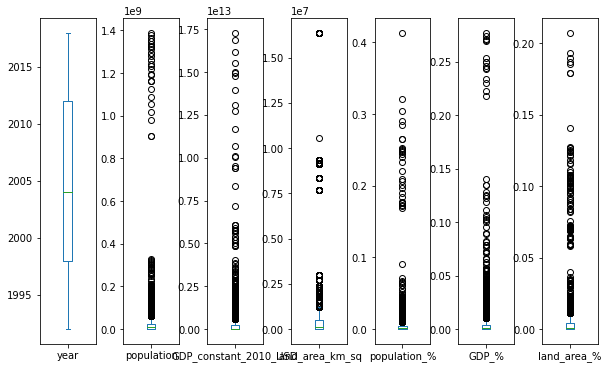

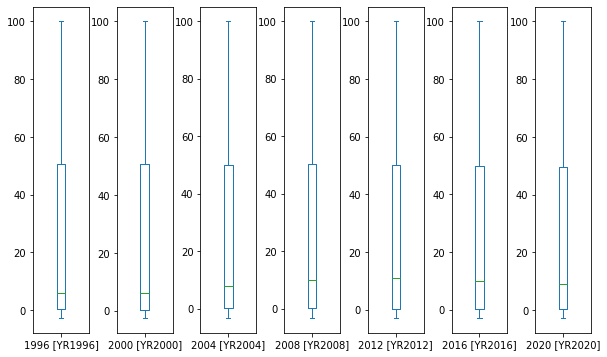

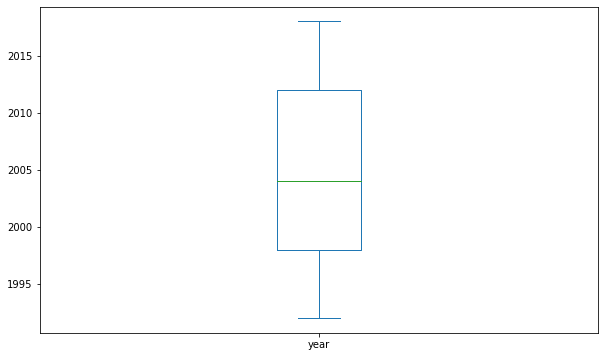

In [5]:
l = con.execute("SHOW TABLES").fetchall()
tables = list([t for (t,) in l])

dictds = {}

for ds in tables:
  # table as dataframe
  df = con.execute(f'SELECT * FROM {ds}').df()
  dictds[ds] = df
  # apply function
  outlierVisualization(dictds[ds])
  

### Outlier removal 

In [6]:
for ds in tables:
  # apply function
  df = outlierRemoving(dictds[ds])
  dictds[ds] = df
  # replace table with new imputed one
  con.execute(f'DROP TABLE IF EXISTS {ds};')
  con.execute(f'CREATE TABLE IF NOT EXISTS {ds} AS SELECT * FROM df;')



before...  26104
after...  23296
before...  84777
after...  69058
before...  107705
after...  103714


<ipython-input-4-68ce86505c0d>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[numdf[col] < q]


### Visualize the results

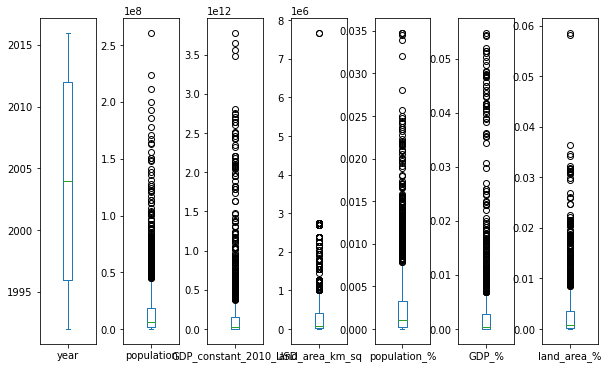

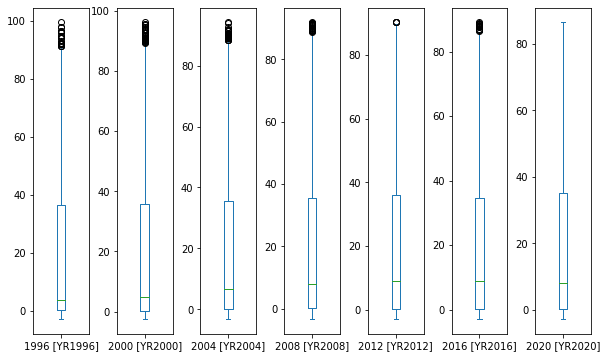

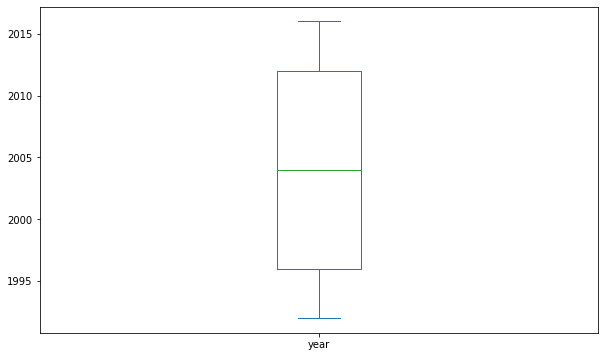

In [7]:
for ds in tables:
  # apply function
  outlierVisualization(dictds[ds])
  

In [8]:
con.execute("SHOW TABLES").fetchall()

[('Country_Level_Data',), ('Governance_Data',), ('Olympics_Data',)]

Close connection

In [9]:
con.close()